In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [38]:
dataset = pd.read_csv("dataset_cleaned.csv")
dataset.drop(["Unnamed: 0", "gdp_growth"], axis = 1, inplace=True)
dataset.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_per_capita
0,Afghanistan,2003,14.738506,9.50,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,190.683814
1,Afghanistan,2004,20.064968,10.90,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,211.382074
2,Afghanistan,2005,25.390894,12.20,7.51,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,242.031313
3,Afghanistan,2006,30.718690,13.85,7.40,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,263.733602
4,Afghanistan,2007,36.051010,15.30,7.25,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,359.693158


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

colName = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)', 
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country']

for i in colName:
    dataset[i] = scaler.fit_transform(dataset[i].values.reshape(-1, 1))

In [40]:
dataset['gdp_per_capita_category'] = np.nan
quartiles = dataset.groupby('Year')['gdp_per_capita'].quantile([0.25, 0.5, 0.75]).unstack()
    
def categorize(row):
    year = row['Year']
    val = row['gdp_per_capita']
    q1 = quartiles.loc[year, 0.25]
    q2 = quartiles.loc[year, 0.5]
    q3 = quartiles.loc[year, 0.75]
    if val <= q1:
        return 0
    elif val <= q2:
        return 1
    elif val <= q3:
        return 2
    else:
        return 3

dataset['gdp_per_capita_category'] = dataset.apply(categorize, axis=1)
dataset.drop(['gdp_per_capita'], axis=1, inplace=True)
dataset.drop(['Entity', 'Year'], axis = 1, inplace=True)

In [43]:
dataset.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_per_capita_category
0,0.147385,0.094094,0.002644,0.381716,0.000060,0.0,0.000288,0.670213,0.000476,0.011731,0.000111,0
1,0.200650,0.108108,0.002533,0.460641,0.000064,0.0,0.000256,0.629213,0.000378,0.005390,0.000093,0
2,0.253909,0.121121,0.002454,0.352770,0.000066,0.0,0.000270,0.634409,0.000560,0.012048,0.000142,0
3,0.307187,0.137638,0.002418,0.332049,0.000039,0.0,0.000293,0.761905,0.000759,0.014902,0.000162,0
4,0.360510,0.152152,0.002369,0.299667,0.000039,0.0,0.000343,0.789474,0.000949,0.015853,0.000163,0


In [44]:
print(dataset.corr()['gdp_per_capita_category'])

Access to electricity (% of population)                             0.734242
Access to clean fuels for cooking                                   0.832665
Renewable-electricity-generating-capacity-per-capita               -0.062553
Renewable energy share in the total final energy consumption (%)   -0.686419
Electricity from fossil fuels (TWh)                                 0.130042
Electricity from nuclear (TWh)                                      0.223603
Electricity from renewables (TWh)                                   0.163272
Low-carbon electricity (% electricity)                             -0.133609
Primary energy consumption per capita (kWh/person)                  0.668629
Energy intensity level of primary energy (MJ/$2017 PPP GDP)        -0.275411
Value_co2_emissions_kt_by_country                                   0.120517
gdp_per_capita_category                                             1.000000
Name: gdp_per_capita_category, dtype: float64


In [45]:
x = dataset.drop(['gdp_per_capita_category'], axis = 1)
y = dataset['gdp_per_capita_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

In [47]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)
prediction = model.predict(x_test)

print(metrics.accuracy_score(prediction, y_test))

0.7558528428093646


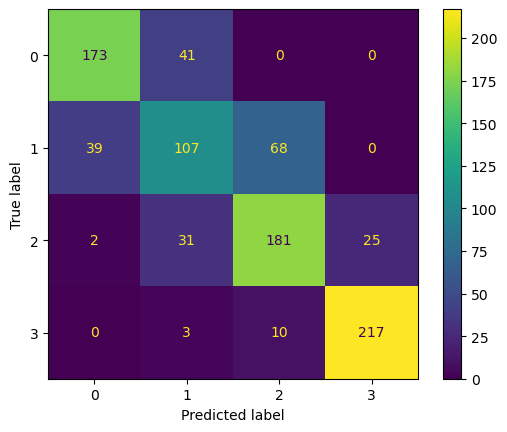

In [48]:
confusionMatrix = metrics.confusion_matrix(y_test, prediction)

figure = metrics.ConfusionMatrixDisplay(confusionMatrix)
figure.plot()